# DBDA - Chapter 5
## Beta - Bernoulli

In [12]:
import sys
import numpy as np

from scipy.stats import beta
from scipy.special import beta as betaFun

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 18})

In [2]:
import sys
sys.path.insert(0, '../Bayes-Python-Funcs/HDIo') 
from HDIofICDF import *

In [3]:
def BernBeta(priorShape, dataVec, credMass=0.95, saveGraph=False):
    """Bayesian updating for Bernoulli likelihood and beta prior.
     Input arguments:
       prior_shape
         vector of parameter values for the prior beta distribution.
       data_vec
         vector of 1's and 0's.
       cred_mass
         the probability mass of the HDI.
     Output:
       post_shape
         vector of parameter values for the posterior beta distribution.
     Graphics:
       Creates a three-panel graph of prior, likelihood, and posterior
       with highest posterior density interval.
     Example of use:
     post_shape = bern_beta(prior_shape=[1,1] , data_vec=[1,0,0,1,1])
     """
    
    #check for errors in the input arguments
    if len(priorShape) != 2:
        sys.exit('prior_shape must have two components.')
    if any([i < 0 for i in priorShape]):
        sys.exit('priorShape components must be positive.')
    if any([i != 0 and i != 1 for i in dataVec]):
        sys.exit('dataVec must be a vector of 1s and 0s.')
    if credMass <= 0 or credMass >= 1.0:
        sys.exit('credMass must be between 0 and 1.')

    # Rename the prior shape parameters, for convenience:
    a, b = priorShape[0], priorShape[1]
    
    # Create summary values of the data:
    z = sum(dataVec[dataVec == 1])  # number of 1's in data_vec
    N = len(dataVec)   # number of flips in data_vec
    
    # Compute the posterior shape parameters:
    postShape = [a+z, b+N-z]
    
    # Compute the evidence, p(D):
    pData = betaFun(z+a, N-z+b)/betaFun(a, b)
    
    # Construct grid of theta values, used for graphing.
    binWidth = 0.005  # Arbitrary small value for comb on theta.
    theta = np.arange(binWidth/2, 1-(binWidth/2)+binWidth, binWidth)
    # Compute the prior at each value of theta.
    pTheta = beta.pdf(theta, a, b)
    # Compute the likelihood of the data at each value of theta.
    pData_given_theta = theta**z * (1-theta)**(N-z)
    
    # Compute the posterior at each value of theta.
    post_a = a + z
    post_b = b+N-z
    pTheta_given_data = beta.pdf(theta, a+z, b+N-z)
    
    # Determine the limits of the highest density interval
    intervals = HDIofICDF(beta, credMass, a=postShape[0], b=postShape[1])

    ##########################################################################################
    # Plot the results.
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(hspace=0.7)
    locx = 0.05
    
    #Plot the prior
    plt.subplot(3, 1, 1)
    plt.plot(theta, pTheta)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(pTheta)*1.2)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$Prob(\theta)$")
    plt.title(r"Prior")
    plt.text(locx, np.max(pTheta)/2, r"beta($\theta$,{},{})".format(a,b))
    
    #Plot the likelihood:
    plt.subplot(3, 1, 2)
    plt.plot(theta, pData_given_theta)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(pData_given_theta)*1.2)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$Prob(D|\theta)$")
    plt.title(r"Likelihood")
    plt.text(locx, np.max(pData_given_theta)/2, f"Data: z={z}, N={N}")
    
    # Plot the posterior:
    plt.subplot(3, 1, 3)
    plt.plot(theta, pTheta_given_data)
    plt.xlim(0, 1)
    plt.ylim(0, np.max(pTheta_given_data)*1.2)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$Prob(\theta|D)$")
    plt.title(r"Posterior")
    locy = np.linspace(0, np.max(pTheta_given_data), 5)
    plt.text(locx, locy[1], f"beta($\theta$, {post_a:.2f}, {post_b:.2f}")
    plt.text(locx, locy[2], f"Prob(D) = {pData:.6f}")
    
    # Plot the HDI
    plt.text(locx, locy[3], f"Intervals = {intervals[0]:.2f} - {intervals[1]:.2f}")
    plt.fill_between(theta, 0, pTheta_given_data,
                    where=np.logical_and(theta > intervals[0],
                    theta < intervals[1]),
                        color='blue', alpha=0.3)
    
    if saveGraph:
        plt.savefig("Fig.png")
    
    return intervals

In [4]:
dataVec = np.repeat([1, 0], [11, 3])  # 11 heads, 3 tail
priorShape=[100, 100]

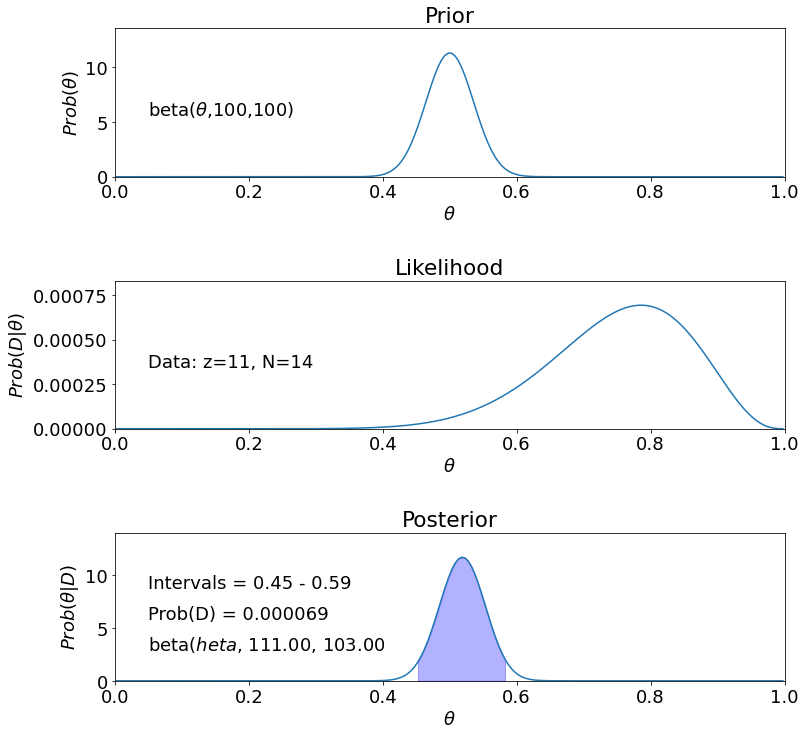

In [13]:
intervals = BernBeta(priorShape, dataVec)
plt.show()